In [22]:
import requests
import json
import cv2
from matplotlib.pyplot import imread,imshow,show
import numpy as np

In [57]:
images = ['/home/daniyal/Desktop/Rekognition_Comparison/Face_Detection_Sample/group_photo.jpeg',
            '/home/daniyal/Desktop/Rekognition_Comparison/Face_Detection_Sample/group_photo1.jpeg',
            ]
url =  "http://127.0.0.1:8000/api/image/"

In [58]:
def draw_bbox_landm(img, x1, y1, x2, y2):
        """draw bboxes and landmarks"""

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 0), 2)
        imshow(img)

Retina Net


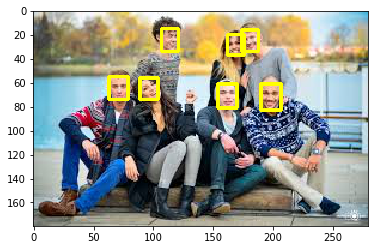

MTCNN


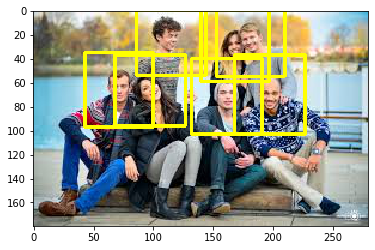

Retina Net


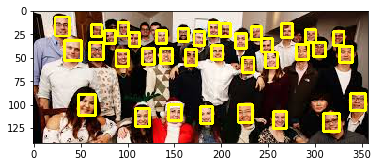

MTCNN


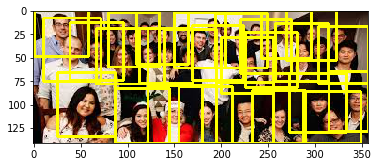

In [59]:
for imagePath in images:
    files = {'file': open(imagePath, 'rb') }
    data={'network':'RetinaFace'}
    response = requests.post(url, files=files,data=data)
        
    response=json.loads(response.text)
    response=response["Faces"]
         
    print("Retina Net")
    img=imread(imagePath)
    for i,_ in enumerate(response):
        draw_bbox_landm(img,int(np.ceil(response[i]["Bounding Boxes"]['left'])),int(np.ceil(response[i]["Bounding Boxes"]['top'])),int(np.ceil(response[i]["Bounding Boxes"]['right'])),int(np.ceil(response[i]["Bounding Boxes"]['bottom'])))
    show()
    
    
    
    
    data={'network':'MTCNN'}
    files = {'file': open(imagePath, 'rb') }
    response = requests.post(url, files=files,)
       
    response=json.loads(response.text)
    response=response["Faces"]
    
    print("MTCNN")
    img=imread(imagePath)
    for i,_ in enumerate(response):
        draw_bbox_landm(img,int(np.ceil(response[i]["Bounding Boxes"]['left'])),int(np.ceil(response[i]["Bounding Boxes"]['top'])),int(np.ceil(response[i]["Bounding Boxes"]['right'])),int(np.ceil(response[i]["Bounding Boxes"]['bottom'])))
    show()